In [1]:
import pandas as pd
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience



In [3]:
graph_db =  GraphDatabase.driver(uri = "bolt://localhost:7687", auth=("neo4j", "password"))

In [5]:
URI  = "bolt://localhost:7687"
creds=("neo4j", "password")

gds =  GraphDataScience(URI,auth=(creds ))



In [236]:
result = gds.run_cypher(
  """
    CALL gds.graph.drop('myGraph_1')
  """
)
display(result)

,graphName,database,memoryUsage,sizeInBytes,nodeCount,relationshipCount,configuration,density,creationTime,modificationTime,schema
0,myGraph_1,neo4j,,-1,61,100,{},0.027322,2022-11-10T14:15:03.083611700+01:00,2022-11-10T14:15:03.098596800+01:00,"{'graphProperties': {}, 'relationships': {'__A..."


In [237]:
result = gds.run_cypher(
  """
CALL gds.graph.project('myGraph_1', {
    Aggregat: { properties: 'class' },
    supply_air_unit: { properties: 'class' },
    exhuset_air_unit: { properties: 'class' },
    Hub: { properties: 'class' },
    Tilluft_ventil: { properties: 'class' },
    Frånluft_ventil: { properties: 'class' },
     Sensor: { properties: 'class' },
     Zon: { properties: 'class' },
      Room: { properties: 'class' }
  },
  '*'
)
  """
)
display(result)

,nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,projectMillis
0,"{'Aggregat': {'label': 'Aggregat', 'properties...","{'__ALL__': {'orientation': 'NATURAL', 'aggreg...",myGraph_1,61,100,11


In [238]:

result = gds.run_cypher(
  """
    CALL gds.graph.list()
  """
)
display(result)

,degreeDistribution,graphName,database,memoryUsage,sizeInBytes,nodeCount,relationshipCount,configuration,density,creationTime,modificationTime,schema
0,"{'p99': 6, 'min': 0, 'max': 9, 'mean': 1.63934...",myGraph_1,neo4j,337 KiB,345736,61,100,{'relationshipProjection': {'__ALL__': {'orien...,0.027322,2022-11-10T14:19:39.215204000+01:00,2022-11-10T14:19:39.226201200+01:00,"{'graphProperties': {}, 'relationships': {'__A..."


In [193]:
result = gds.run_cypher(
  """
 CALL gds.beta.pipeline.nodeClassification.create('pipe_6')
  """
)
display(result)

,name,nodePropertySteps,featureProperties,splitConfig,autoTuningConfig,parameterSpace
0,pipe_6,[],[],"{'testFraction': 0.3, 'validationFolds': 3}",{'maxTrials': 10},"{'MultilayerPerceptron': [], 'RandomForest': [..."


In [239]:

result = gds.run_cypher(
  """
CALL gds.beta.pipeline.nodeClassification.addLogisticRegression('pipe', {maxEpochs: 500, penalty: {range: [1e-4, 1e2]}})
YIELD parameterSpace
RETURN parameterSpace.RandomForest AS randomForestSpace, parameterSpace.LogisticRegression AS logisticRegressionSpace, parameterSpace.MultilayerPerceptron AS MultilayerPerceptronSpace
  """
)
display(result)

,randomForestSpace,logisticRegressionSpace,MultilayerPerceptronSpace
0,[],"[{'maxEpochs': 500, 'minEpochs': 1, 'penalty':...","[{'maxEpochs': 100, 'minEpochs': 1, 'penalty':..."


In [241]:
result = gds.run_cypher(
  """
CALL gds.beta.pipeline.nodeClassification.train.estimate('myGraph_1', {
  pipeline: 'pipe',
  targetNodeLabels: ['*'],
  modelName: 'nc-pipeline-model',
  targetProperty: 'class',
  randomSeed: 2,
  metrics: [ 'ACCURACY' ]
})
YIELD requiredMemory
  """
)
display(result)


,requiredMemory
0,[3273 KiB ... 3304 KiB]


In [247]:


result = gds.run_cypher(
  """
CALL gds.beta.pipeline.nodeClassification.predict.stream.estimate('myGraph_1', {
  modelName: 'nc-pipeline-model',
  includePredictedProbabilities: true,
  targetNodeLabels: ['*']
})
YIELD requiredMemory


  """
)
display(result)


,requiredMemory
0,3072 Bytes


,classifiednoder,predictedClass,confidence
0,1.0,3,[0.9999999999999997]
1,2.0,3,[0.9999999999999997]
2,3.0,3,[0.9999999999999997]
3,3.0,3,[0.9999999999999997]
4,3.0,3,[0.9999999999999997]
...,...,...,...
56,8.0,3,[0.9999999999999997]
57,8.0,3,[0.9999999999999997]
58,8.0,3,[0.9999999999999997]
59,8.0,3,[0.9999999999999997]


array([[<AxesSubplot: title={'center': 'classifiednoder'}>,
        <AxesSubplot: title={'center': 'predictedClass'}>]], dtype=object)

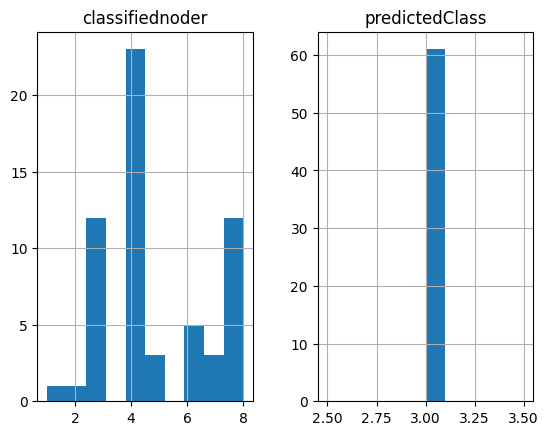

In [248]:

result = gds.run_cypher(
  """
CALL gds.beta.pipeline.nodeClassification.predict.stream('myGraph_1', {
  modelName: 'nc-pipeline-model',
  includePredictedProbabilities: true,
  targetNodeLabels: ['*']
})
 YIELD nodeId, predictedClass, predictedProbabilities
WITH gds.util.asNode(nodeId) AS alla_noder , predictedClass, predictedProbabilities
RETURN
  alla_noder.class AS classifiednoder,
  predictedClass,
  predictedProbabilities AS confidence

  ORDER BY classifiednoder


  """
)
display(result)
result.hist()

In [205]:
x=result['confidence']
for t in x:
    print(t)

[0.9999999999999997]
[0.9999999999999997]
[0.9999999999999997]
[0.9999999999999997]
[0.9999999999999997]
[0.9999999999999997]
[0.9999999999999997]
[0.9999999999999997]
[0.9999999999999997]
[0.9999999999999997]
[0.9999999999999997]
[0.9999999999999997]


In [217]:
result = gds.run_cypher(
  """
CALL gds.beta.pipeline.nodeClassification.predict.mutate('myGraph', {
  targetNodeLabels: ['*'],
  modelName: 'nc-pipeline-model',
  mutateProperty: 'predictedClass',
  predictedProbabilityProperty: 'predictedProbabilities'
}) YIELD nodePropertiesWritten


  """
)
display(result)

,nodePropertiesWritten
0,122


In [218]:
result = gds.run_cypher(
  """
CALL gds.beta.pipeline.nodeClassification.predict.write('myGraph', {
  targetNodeLabels: ['Aggregat'],
  modelName: 'nc-pipeline-model',
  writeProperty: 'predictedClass',
  predictedProbabilityProperty: 'predictedProbabilities'
}) YIELD nodePropertiesWritten


  """
)
display(result)

,nodePropertiesWritten
0,2
